In [1]:
from __future__ import division 
# to get in-line plots
%matplotlib nbagg
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy as sp
from scipy import stats
import datetime
import math
import csv
adj={}
exist={}
count=0
index_a=0
index_b=0
i=1

#creating the adjacency list
#if I want the graph directed just put True on the variable
directed=False

#if I want the full graph set this to False
#for computational reasons is set to True
just_page=True
if just_page:
    fname = "links_category.csv"
else:
    fname = "links.csv"
with open(fname) as f:
    for row in csv.reader(f, delimiter=','):
        if exist.has_key(int(row[0])):
            index_a=exist[int(row[0])]
        else:
            exist.setdefault(int(row[0]),count)
            index_a=count
            adj.setdefault(index_a,[])
            count+=1
        if exist.has_key(int(row[1])):
            index_b=exist[int(row[1])]
        else:
            exist.setdefault(int(row[1]),count)
            index_b=count
            adj.setdefault(index_b,[])
            count+=1
        #small difference from the previous algorithm
        #avoid selfloops due to(probably) data pre-process
        #or errors in the Wikipedia DB
        if index_a!=index_b:
            adj[index_a].append(index_b)
        if directed==False:
            if index_a!=index_b:
                adj[index_b].append(index_a)
del f
n = len(adj)

print "Import done"

Import done


In [2]:
#divide all in test set probe set and inactive set
#random from 0 to len(adj)
import random
adj_test={}
adj_probe={}
sums=0

for i in adj.keys():
    if len(adj[i])>0:
        count=math.ceil(random.uniform(len(adj[i])*9/13,len(adj[i])))
        sums+=count
        adj_test.setdefault(i,random.sample(adj[i],int(count)))
        adj_probe.setdefault(i,np.setdiff1d((adj[i]),adj_test[i]))

print "Splitting in probe and test done"
#Split the graph
#so I can run different scores in equal amount of links
#without re-run the algorithm in all the graph for each one
#of the scores
sums=0
j=1
indexes=[0]
total=0.

for i in adj_test.keys():
    for k in adj_test[i]:
        total+=len(adj_test[k])

for i in adj_test.keys():
    for k in adj_test[i]:
        sums+=len(adj_test[k])
    if sums>=j*total/10:
            indexes.append(i)
            j+=1
            
print indexes
print "Node intervals split by watching number of links done"

in_deg=np.zeros(n)
out_deg=np.zeros(n)
deg=np.zeros(n)
for i in range(len(out_deg)):
    out_deg[i]=len(adj[i])
    for j in adj[i]:
        in_deg[j]+=1
for i in range(len(deg)):
    if directed==False:
        deg[i]=out_deg[i]
    else:
        deg[i]=out_deg[i]+in_deg[i]
deg_dist=deg/n

print "Setting up done."

Splitting in probe and test done
[0, 217323, 361673, 503927, 668205, 819748, 985726, 1167999, 1347653, 1473143, 1562563]
Node intervals split by watching number of links done
Setting up done.


In [ ]:
#if either one of the list in input has length 0
#obv the intersection between them is 0
#as |i intersect j| is the numerator of all these scores
#I directly return 0
def scoring(j,i,index):
    if (len(i)==0)|(len(j)==0):
        return 0
    temp=np.intersect1d(j,i)
    len_int= float(len(temp))
    if index==0:
        return len_int
    elif index==1:
        return len_int/(len(i)*len(j))
    elif index==2:
        return len_int/(len(i)*len(j))**0.5
    elif index==3:
        return len(i)*len(j)
    elif index==4:
        return len_int/min(len(i),len(j))
    elif index==5:
        return len_int/max(len(i),len(j))
    elif index==6:
        return 2*len_int/(len(i)+len(j))
    elif index==7:
        return len_int/(len(np.union1d(j,i)))

In [ ]:
cn={}
count=0
x=1

#the next 3 lines are needed to run the scores in different order
#in successive runs of the algorithm. by doing so each score can be evaluated 
#"equally" likely on all the 10 subset of nodes
score_n=0
order=np.arange(0,10,1)
random.shuffle(order)

time=datetime.datetime.now()

#the names associated for each score
names={0:'Common neighbors',1:'Leicht-Holme-Newman',2:"Salton",3:"Preferential Attachment",4:"Hub promoted",5:"Hub depressed",6:"Soresen",7:"Jaccard",8:'Adamic-Adar',9:'Resource allocation'}

#speeding up a bit
for i in range(len(indexes)):
    indexes[i]=i*100

nscore=0
done=True

for i in adj_test.keys():
    if i!=0 and i in indexes:
        #calculate the score     #AUC #by following the paper
        nscore+=1
        score_zeros=0.
        score_good=0.
        score_good_bis=0.
        score_zeros_bis=0.
        tries=0
        while tries<10:#tried also with 1000 and 10000 results seems not changing much
            #take node1 for probe
            #take node2 for non-active
            node1=random.randint(indexes[score_n],indexes[score_n+1]-1)
            node2=random.randint(indexes[score_n],indexes[score_n+1]-1)
            #if len(adj_probe[node1]==0) I'm very unlucky but I cannot
            #compute the score as my node has no neighbors in the probe set
            if len(adj_probe[node1]!=0):
                p_node=adj_probe[node1][random.randint(0,len(adj_probe[node1])-1)]
                #links that does not exist in the real network
                temp=np.setdiff1d(adj.keys(),adj[node2])
                #select the node that does not have a link to my node
                i_node=temp[random.randint(0,len(temp)-1)]
                #these lines of codes that are commented are useful if we run the code
                #in a undirected network and in the full network
                #the score(i,j)=score(j,i) and this is considered(but commented) when I calculate
                #the scores
            
                #if node>p_node:
                #    x1=p_node
                #    y1=node1
                #else:
                x1=node1
                y1=p_node
                
                #if node>i_node:
                #    x2=i_node
                #    y2=node2
                #else:
                x2=node2
                y2=i_node
                
                #get the scores
                s_probe=0.
                if cn[x1].has_key(y1):
                    s_probe=cn[x1][y1]
                s_inactive=0.
                if cn[x2].has_key(y2):
                    s_inactive=cn[x2][y2]
                    
                #check them
                #like what is done by the paper
                if s_probe==s_inactive:
                    score_zeros+=0.5
                if s_probe>s_inactive:
                    score_good+=1
                #alternative way
                if s_inactive==0:
                    score_zeros_bis+=1
                if s_probe>0:
                    score_good_bis+=1
                tries+=1.
        del cn
        cn={}
        done=False
        print "The",score_n+1,"score is:",(score_zeros+score_good)/100,"with method:",names[order[score_n]]
        print "The alternative score is:",(score_zeros_bis+score_good_bis)/(2*tries)
        print "and took:",datetime.datetime.now()-time,"\n"
        time=datetime.datetime.now()
        score_n+=1
        x=0
    if nscore==10:
        break
    count+=1
    cn.setdefault(i,{})
    first = adj_test[i]
    for k in adj_test[i]:
        if k!=i: #k could be > i if the network is undirected and if considered in its completeness
            if ~cn[i].has_key(k):
                #particular scores that is considered here for simplicity
                second = adj_test[k]
                if order[score_n]==8:
                    cn[i].setdefault(k,sum(1./math.log(len(adj_test[neigh_comm])) for neigh_comm in np.intersect1d(second,first)))
                elif order[score_n]==9:
                    cn[i].setdefault(k,sum(1./len(adj_test[neigh_comm]) for neigh_comm in np.intersect1d(second,first))) 
                else:
                    cn[i].setdefault(k,scoring(second,first,order[score_n]))
        for j in adj_test[k]:
            if j!=i: #j could be > i if the network is undirected and if considered in its completeness
                if ~cn[i].has_key(j):
                    second = adj_test[j]
                    if order[score_n]==8:
                        cn[i].setdefault(j,sum(1./math.log(len(adj_test[neigh_comm])) for neigh_comm in np.intersect1d(second,first)))
                    elif order[score_n]==9:
                        cn[i].setdefault(j,sum(1./len(adj_test[neigh_comm]) for neigh_comm in np.intersect1d(second,first)))
                    else:
                        cn[i].setdefault(j,scoring(second,first,order[score_n]))
    #timestamps
    if count>=x*20000:
        if done is True:
            print count, datetime.datetime.now()-time, "with", names[order[score_n]],"score"
        x+=1
        if done is False:
            while count>=x*20000+1:
                x+=1
        done=True
print "Finish"

#With matrix would take much lower times due to the high number of intersection between lists that I have to do
#but in this way, since I do not have the possibility to host A^2, I can account for all possible intersections between nodes.
#If I drop even half of the matrix I will loose a very high amount of information and my algorithm will be useless.
#Anyway a simple method would be to get G=A*A and A, then if I want the number of neigh of node i I will watch the i-th row/column of A
#and then I can find the min/max everything.
#We can also to speed up thing do a calculation in place, so if I need the score of the link i-j from the probe I can use the test
#to calculate the score of just that node and then take the coefficient corresponding to the link from i to j. 
#This is also simplier but since it's not "complete" I decided to get a full algorithm the most exaustive possible to have a possibly better
#coherence of my results.
#The results are precise even with a small number of nodes because I keep in consideration all the other ones, not only the square matrix [lower_index, upper_index] where lower is the first index of the chunk and upper is the last one

In [ ]:
from scipy.sparse import coo_matrix

#as 37753 is the node with the largest degree I've made a choice to include it in the chunk of nodes
#where I am going to compute the Katz score
#the chunk is very small because one of the step is to compute the inverse(in this case pseudo inverse) of the matrix
#and this take a very big amount of memory and time to compute
#The results obviusly could be not really significant in this case but by comparision to the next one I think it's a good approx
rows = []
columns = []
data = []
count_x=0
indexes=[30000,45000]
max_index=1
for i in adj_test.keys():
    count_y=0
    if (indexes[0]<=i) & (i<=indexes[max_index]):
        for j in adj_test[i]:
            #7 G*G works well on laptop
            #8 stuck
            #try home
            #NOT SO PRECISE IF DROP LINKS AND NODES
            #TRY TO FIGURE OUT THIS PROBLEM
            if (indexes[0]<=j) & (j<=indexes[max_index]):
                rows.append(i-indexes[0])
                columns.append(j-indexes[0])
                data.append(1)
        #print i==indexes[k]
        if (i==indexes[max_index]):
            G = sp.sparse.csc_matrix((data,(rows,columns)),dtype=np.float)
            beta = 1/sp.sparse.linalg.eigs(G,k=1,which='LM',return_eigenvectors=False)
            print "For Katz 1/beta must be greater than", 1/beta
            #1/b > eigen
            #1/eigen > beta
            #beta< 1/eigen
            beta = beta-beta/10
            print "Set to",1/beta
            identity = sp.sparse.identity(G.shape[0])
            S = identity-G.multiply(-beta)
            S = S.todense()
            S = np.linalg.pinv(S,rcond=1e-10)
            S = sp.sparse.csr_matrix(S)
            S = S-identity
            S = sp.sparse.csr_matrix(S)
            S = S-identity

score_zeros=0
score_good=0
tries = 0
while tries<1000:#tried also with 1000 and 10000 results seems not changing much
    #select my i-node in the interval that I am considering
    node1=random.randint(indexes[0]-1,indexes[1]-1)
    node2=random.randint(indexes[0]-1,indexes[1]-1)
    #choose a node in the probe set
    inter = np.setdiff1d(np.intersect1d(adj_probe[node1],range(indexes[max_index]+1)),np.intersect1d(range(indexes[0]),adj_probe[node1]))
    if len(inter)!=0:
        p_node= inter[random.randint(0,len(inter)-1)]

        #links that does not exist in the real network
        temp=np.setdiff1d(adj.keys(),adj[node2])
        #print temp
        temp=np.setdiff1d(np.intersect1d(temp,range(indexes[max_index]+1)),np.intersect1d(range(indexes[0]),temp))
        #print temp
        #select the node that does not have a link to my node
        i_node=temp[random.randint(0,len(temp)-1)]
        x1=node1-indexes[0]
        y1=p_node-indexes[0]
        x2=node2-indexes[0]
        y2=i_node-indexes[0]
        s_probe=S[x1,y1]
        #get the scores
        s_inactive=S[x2,y2]
        if s_probe==s_inactive:
            score_zeros+=0.5
        if s_probe>s_inactive:
            score_good+=1
        tries+=1
A = S.tocoo()
in_probe=0
top=0
while top<1000:
    position=[]
    max_val = S.data.argmax()
    position.append(A.row[max_val])
    position.append(A.col[max_val])
    if (adj_probe.has_key(position[0])):
        if (position[1] in adj_probe[position[0]]):
            in_probe+=1
    top+=1
    S[position[0],position[1]]=0
print "Score Katz:", (score_zeros+score_good)/tries
print "Precision Katz:", in_probe/top
print ""

from scipy.sparse import coo_matrix

rows = []
columns = []
data = []
count_x=0
indexes=[400000]
max_index=0
for i in adj_test.keys():
    count_y=0
    if i<=indexes[max_index]-1:
        for j in adj_test[i]:
            if (j<=indexes[max_index]-1):
                rows.append(i)
                columns.append(j)
                data.append(1)
        #print i==indexes[k]
        if (i==indexes[max_index]-1):
            G = sp.sparse.csc_matrix((data,(rows,columns)),dtype=np.float)
            
A = G*G            

print "Score Local Path(Quasi Local)"
B = G*G*G
for epsilon in np.arange(0,1,0.15):
    S = A-B.multiply(epsilon)
    
    score_zeros=0
    score_good=0
    tries = 0
    while tries<1000:#tried also with 1000 and 10000 results seems not changing much
        #select my i-node in the interval that I am considering
        node1=random.randint(0,indexes[max_index]-1)
        node2=random.randint(0,indexes[max_index]-1)
        #choose a node in the probe set
        inter = np.intersect1d(adj_probe[node1],range(indexes[max_index]))
        if len(inter)!=0:
            p_node= inter[random.randint(0,len(inter)-1)]

            #links that does not exist in the real network
            temp=np.setdiff1d(adj.keys(),adj[node2])
            temp=np.intersect1d(temp,range(indexes[max_index]))
            #select the node that does not have a link to my node
            i_node=temp[random.randint(0,len(temp)-1)]
            x1=node1
            y1=p_node
            x2=node2
            y2=i_node
            s_probe=S[x1,y1]
            #get the scores
            s_inactive=S[x2,y2]
            if s_probe==s_inactive:
                score_zeros+=0.5
            if s_probe>s_inactive:
                score_good+=1
            tries+=1
    print "Score for epsilon=",epsilon,"is:",(score_zeros+score_good)/tries

    C = S.tocoo()
    in_probe=0
    top=0
    while top<1000:
        position=[]
        max_val = S.data.argmax()
        position.append(C.row[max_val])
        position.append(C.col[max_val])
        if (adj_probe.has_key(position[0])):
            if (position[1] in adj_probe[position[0]]):
                in_probe+=1
        top+=1
        S[position[0],position[1]]=0
    print "And precision is:",in_probe/top

In [4]:
fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(adj.keys(),deg_dist,'r-')
plt.legend(['Probability'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Degree probability per node')
plt.show()
del fig
del axx

iteration=1
max_iter=60
change=2
delta=1e-6
s=0.85

iteration=1
change=2
v = np.zeros(n)
p = deg_dist.copy()
track = []

total_time = datetime.datetime.now()
while change>delta:
    time=datetime.datetime.now()
    iteration+=1
    for j in xrange(n):
        v[j]=sum([p[k]/deg[k] for k in adj[j]])
    temp=v/np.sum(v)
    change=np.sum(np.abs(p-temp))
    if iteration in np.arange(0,max_iter,max_iter/10):
        print change,"is the change in the iteration:",iteration-1
    p=temp
    track.append(change)
    if iteration==max_iter-1:
        print "MAX ITERATION REACHED, LAST CHANGE:",change
        break
print "With \"classic\" method",iteration,"iterations:"
print "-max",max(p),"in position",np.argmax(p)
print "-min",min(p),"in position",np.argmin(p)
print "-mean",sum(p)/len(p)
print "and took:", datetime.datetime.now()-total_time,"\n"
print "The sum should be 1:",sum(p)

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(adj.keys(),p,'k-')
plt.legend(['Page Rank'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Page Rank')
plt.show()
del fig
del axx

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(range(len(track)),track,'k-')
plt.legend(['Accuracy'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Accuracy behaviour')
plt.show()
del fig
del axx


#for pages without out-link
dang = sum([p[j] for j in adj.keys() if len(adj[j])==0])
v = np.zeros(n)
p = deg_dist.copy()
iteration=1
change=2
track=[]

total_time = datetime.datetime.now()
while change>delta:
    time=datetime.datetime.now()
    for j in xrange(n):
        v[j]=s*sum([p[k]/deg[k] for k in adj[j]])+(1-s)/n+s*dang/n  
    iteration+=1
    temp=v/np.sum(v)
    change=np.sum(np.abs(p-temp))
    track.append(change)
    if iteration in np.arange(0,max_iter,max_iter/10):
        print change,"is the change in the iteration:",iteration-1
    p=temp
    if iteration==max_iter-1:
        print "MAX ITERATION REACHED, LAST CHANGE:",change
        break
print "With \"classic\" method",iteration,"iterations:"
print "-max",max(p),"in position",np.argmax(p)
print "-min",min(p),"in position",np.argmin(p)
print "-mean",sum(p)/len(p)
print "and took:", datetime.datetime.now()-total_time,"\n"
print "The sum should be 1:",sum(p)

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(adj.keys(),p,'k-')
plt.legend(['Page Rank - Teleportation'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Page Rank')
plt.show()
del fig
del axx

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(range(len(track)),track,'k-')
plt.legend(['Accuracy - With teleportation'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Accuracy behaviour')
plt.show()
del fig
del axx

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

MAX ITERATION REACHED, LAST CHANGE: 0.0892587486096
With "classic" method 60 iterations:
-max 0.00266598136167 in position 37753
-min 0.0 in position 1562060
-mean 6.39972967541e-07
and took: 0:00:07.363000
The sum should be 1: 0.999998720053 



<IPython.core.display.Javascript object>


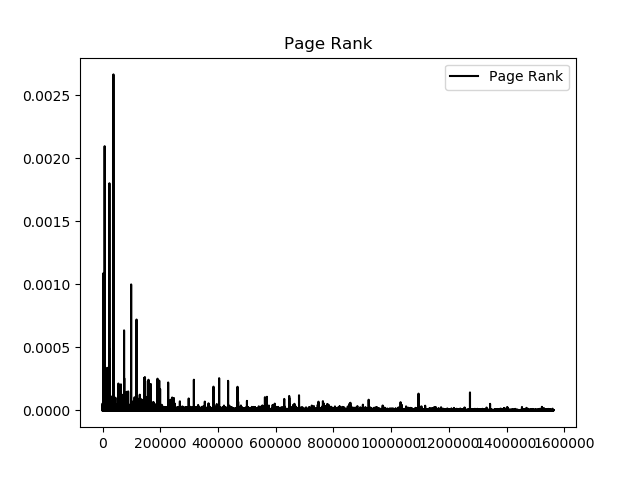

<IPython.core.display.Javascript object>


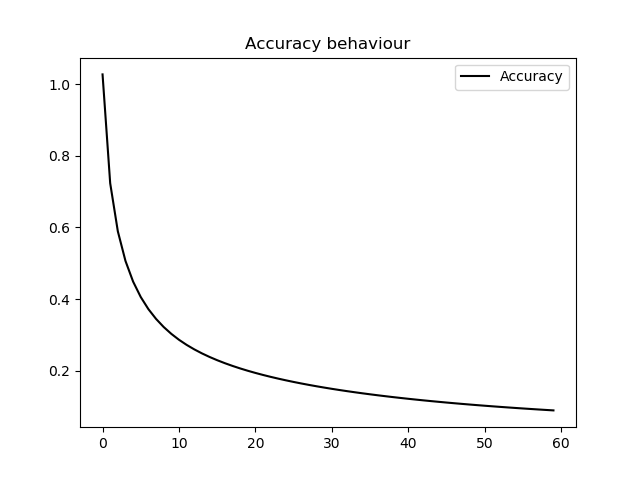

1.74277689188e-06
6.39973786674e-07
MAX ITERATION REACHED, LAST CHANGE: 5.19739561106e-06
With teleportation and dangling in 60 iterations:
-max 0.0055177280546 in position 99102
-min 9.59961724406e-08 in position 1562060
-mean 6.39973786674e-07
and took: 0:00:09.788000
The sum should be 1: 1.0


<IPython.core.display.Javascript object>


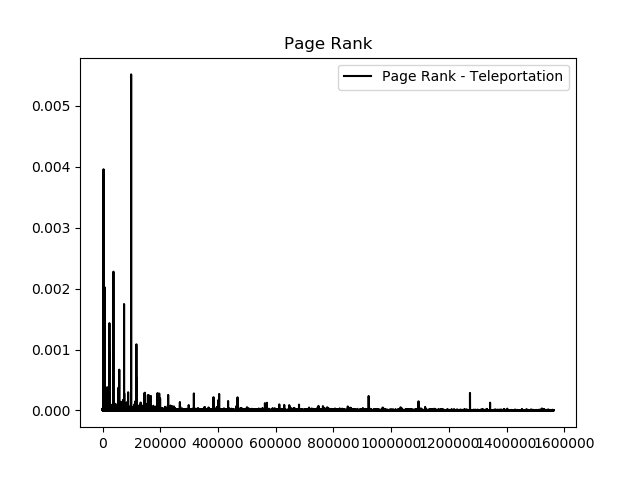

<IPython.core.display.Javascript object>


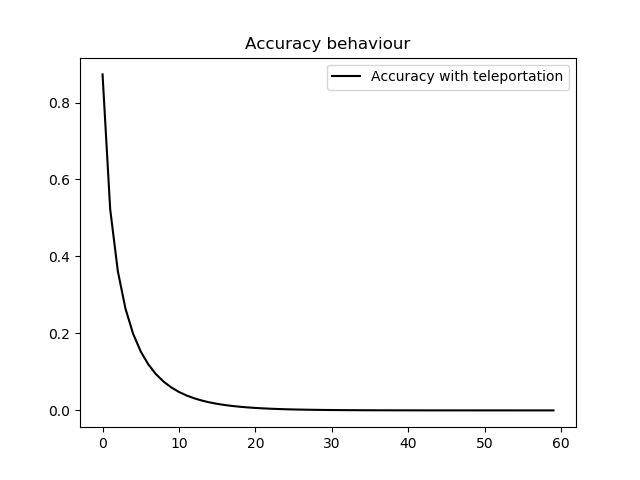

In [5]:
rows = []
columns = []
data = []
for i in adj.keys():
    for j in adj[i]:
        rows.append(i)
        columns.append(j)
        data.append(1)
M = sp.sparse.csc_matrix((data,(rows,columns)),dtype=np.float64)
    
nodelist = list(adj.keys())
from sklearn.preprocessing import normalize
M = normalize(M, norm='l1', axis=0)
M = M.T

x = np.ones(n)/n
p = np.ones(n)/n

is_dangling=[]
for i in range(len(deg)):
    if deg[i]==0:
        is_dangling.append(i)
dang = p
delta = 1e-6
track = []
time = datetime.datetime.now()
count=0
for iteration in range(max_iter):
    count+=1
    xlast = x
    x = x * M
    change = sp.absolute(x - xlast).sum()
    track.append(change)
    if change < delta:
        break
if count==max_iter:
    print "MAX ITERATION REACHED, LAST CHANGE:",change
print "With \"classic\" method",count,"iterations:"
print "-max",max(x),"in position",np.argmax(x)
print "-min",min(x),"in position",np.argmin(x)
print "-mean",sum(x)/len(x)
print "and took:", datetime.datetime.now()-time
print "The sum should be 1:",sum(x),"\n"

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(adj.keys(),x,'k-')
plt.legend(['Page Rank'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Page Rank')
plt.show()
del fig
del axx

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(range(len(track)),track,'k-')
plt.legend(['Accuracy'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Accuracy behaviour')
plt.show()
del fig
del axx

count=0
track = []
time = datetime.datetime.now()
x = np.ones(n)/n
p = np.ones(n)/n

for iteration in range(max_iter):
    count+=1
    xlast = x
    x = s * (x * M + sum(x[is_dangling]) * dang) + (1 - s) * p
    change = sp.absolute(x - xlast).sum()
    track.append(change)
    if change < delta:
        break
        
if count==max_iter:
    print "MAX ITERATION REACHED, LAST CHANGE:",change
print "With teleportation and dangling in",count,"iterations:"
print "-max",max(x),"in position",np.argmax(x)
print "-min",min(x),"in position",np.argmin(x)
print "-mean",sum(x)/len(x)
print "and took:", datetime.datetime.now()-time
print "The sum should be 1:",sum(x)

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(adj.keys(),x,'k-')
plt.legend(['Page Rank - Teleportation'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Page Rank')
plt.show()
del fig
del axx

fig=plt.figure()
axx = fig.add_subplot(111)
axx.plot(range(len(track)),track,'k-')
plt.legend(['Accuracy with teleportation'])
#plt.xscale('log')
#plt.yscale('log')
plt.title('Accuracy behaviour')
plt.show()
del fig
del axx
#two run of the algorithm gibes the same result
#argmax on 99102 but 0.0055 -> 0.5 %  -> TODO FIND MEANING OF THIS RESULT
#pretty good speed as it take only 44 iteration